In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import CellDrift as ct
import random
import anndata as ad

In [2]:
adata = sc.read('../per_cellstate_subset_COLO_005_130125.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 46635 × 2053
    obs: 'sample', 'species', 'gene_count', 'tscp_count', 'mread_count', 'bc1_wind', 'bc2_wind', 'bc3_wind', 'bc1_well', 'bc2_well', 'bc3_well', 'sublib', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'outlier', 'n_genes', 'doublet_scores', 'predicted_doublets', 'split_batch', 'doublet_assign', 'experiment', 'sample_orig', 'sample_num', 'condition', 'sample_name', 'leiden_subclust_0.5', 'leiden_subclust_0.6', 'leiden_subclust_0.7', 'leiden_subclust_0.8', 'leiden_subclust_0.9', 'leiden_subclust_1.0', 'leiden_subclust_1.1', 'leiden_subclust_1.2', 'leiden_subclust_1.3', 'leiden_subclust_1.4', 'leiden_subclust_1.5', 'S_score', 'G2M_score', 'phase', 'cell_cycle_diff', 'rep', 

In [4]:
adata.obs['time'] = adata.obs['time'].str[:2]
adata.obs['time'] = adata.obs['time'].astype(int)
adata.obs['size_factor'] = np.sum(adata.X, axis = 1)

In [13]:
adata.obs['final_group_labeled'] = adata.obs['final_group_labeled'].replace({'Stress, EMT': 'Stress'})
np.unique(adata.obs['final_group_labeled'])

array(['Cycling', 'Hybrid/Fetal-like', 'Hybrid/Stem-like', 'Respiration',
       'Secretory-like', 'Stress'], dtype=object)

In [5]:
adata = ct.setup_celldrift(
    adata,
    cell_type_key = 'final_group_labeled',
    perturb_key = 'drug',
    time_key = 'time',
    control_name = 'DMSO',
    perturb_name = None,
    size_factor_key = 'total_counts',
    batch_key = 'rep',
    n_reps = 3,
    n_cells_perBlock = 100,
    use_pseudotime = False,
    min_cells_perGene = 200
)

In [6]:
adata.obs

,sample,species,gene_count,tscp_count,mread_count,bc1_wind,bc2_wind,bc3_wind,bc1_well,bc2_well,...,time,module_sample,sample_grouped_mod,grouped_mod,final_group_labeled,size_factor,combs,selection_rep_1,selection_rep_2,selection_rep_3
02_35_39_6862STDY14619180,COLO,refdata-gex-GRCh38-2020-A-v1-1-2,3606,6871,9740,2,35,39,A2,C11,...,24,4,1_COLO_005,1,Cycling,336.422516,Cycling-DMSO-24,False,False,False
47_26_79_6862STDY14579397,COLO,refdata-gex-GRCh38-2020-A-v1-1-2,2397,3856,4528,47,26,79,D11,C2,...,24,4,1_COLO_005,1,Cycling,283.103729,Cycling-DMSO-24,True,False,False
02_59_75_6862STDY14619183,COLO,refdata-gex-GRCh38-2020-A-v1-1-2,2333,3589,4703,2,59,75,A2,E11,...,24,4,1_COLO_005,1,Cycling,269.838318,Cycling-DMSO-24,False,False,False
02_92_83_6862STDY14619185,COLO,refdata-gex-GRCh38-2020-A-v1-1-2,3519,6666,8374,2,92,83,A2,H8,...,24,4,1_COLO_005,1,Cycling,332.498230,Cycling-DMSO-24,False,False,False
02_22_69_6862STDY14619177,COLO,refdata-gex-GRCh38-2020-A-v1-1-2,2961,5177,6774,2,22,69,A2,B10,...,24,4,1_COLO_005,1,Cycling,338.701263,Cycling-DMSO-24,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74_60_83_6862STDY14579401,COLO,refdata-gex-GRCh38-2020-A-v1-1-2,2420,3747,4419,74,60,83,G2,E12,...,72,11,5_COLO_005,5,"Stress, EMT",317.042847,"Stress, EMT-SHP099-72",True,False,False
74_82_85_6862STDY14579398,COLO,refdata-gex-GRCh38-2020-A-v1-1-2,3793,7001,8211,74,82,85,G2,G10,...,72,11,5_COLO_005,5,"Stress, EMT",318.197266,"Stress, EMT-SHP099-72",True,False,False
74_91_15_6862STDY14579398,COLO,refdata-gex-GRCh38-2020-A-v1-1-2,5429,13601,16045,74,91,15,G2,H7,...,72,11,5_COLO_005,5,"Stress, EMT",364.473389,"Stress, EMT-SHP099-72",False,False,False
74_81_82_6862STDY14579395,COLO,refdata-gex-GRCh38-2020-A-v1-1-2,6749,19082,23033,74,81,82,G2,G9,...,72,11,5_COLO_005,5,"Stress, EMT",376.937531,"Stress, EMT-SHP099-72",False,False,False


In [7]:
adata = ct.model_timescale(
    adata,
    n_processes = 16,
    chunksize = 100,
    pairwise_contrast_only = False,
    adjust_batch = False
)

  0%|                                                                                                                                                                                           | 0/3 [00:00<?, ?it/s]... storing 'combs' as categorical
... storing 'combs' as categorical
... storing 'combs' as categorical

 33%|███████████████████████████████████████████████████████████▎                                                                                                                      | 1/3 [14:40<29:20, 880.18s/it]... storing 'combs' as categorical
... storing 'combs' as categorical
... storing 'combs' as categorical

 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 2/3 [26:55<13:14, 794.85s/it]... storing 'combs' as categorical
... storing 'combs' as categorical
... storing 'combs' as categorical

100%|███████████████████████████████████

In [2]:
# load data
df_zscore = pd.read_csv('/lustre/scratch125/casm/team215mg/pg21_rotation/Temporal_CellDrift/Contrast_Coefficients_combined_zscores_.txt', sep = '\t', header = 0, index_col = 0)
df_meta = pd.read_csv('/lustre/scratch125/casm/team215mg/pg21_rotation/Temporal_CellDrift/Contrast_Coefficients_combined_metadata_.txt', sep = '\t', header = 0, index_col = 0)

# redefine timepoints
time_origin = [24, 48, 72]
time_new = [1, 2, 3]
time_dict = dict(zip(time_origin, time_new))
df_meta['time'] = [time_dict[i] for i in df_meta['time']]

In [3]:
fda = ct.FDA(df_zscore, df_meta)

In [4]:
fd, genes = fda.create_fd_genes(genes = df_zscore.index.values, cell_type = 'Cycling', perturbation = 'MRTX1133')
df_cluster = ct.fda_cluster(fd, genes, n_clusters = 8, seed = 42, output_folder = '/lustre/scratch125/casm/team215mg/pg21_rotation/Temporal_CellDrift/')

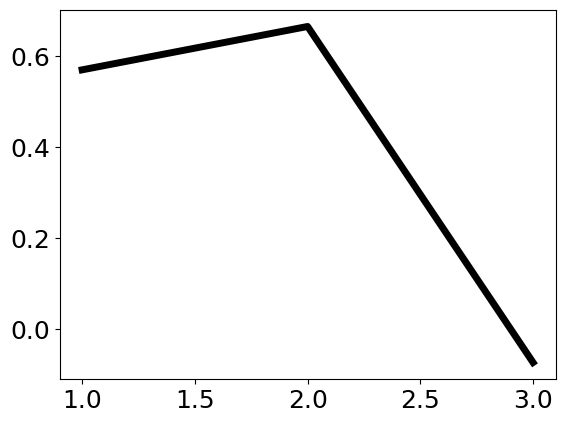

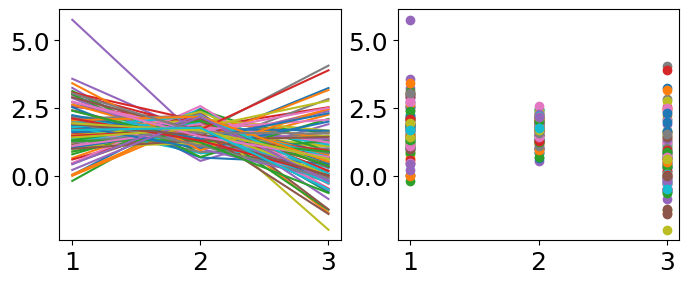

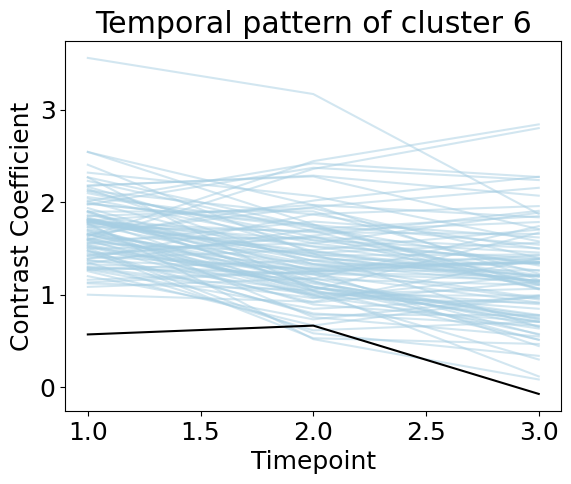

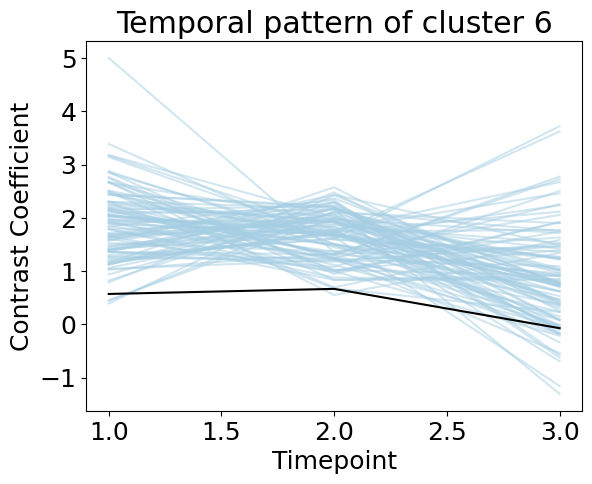

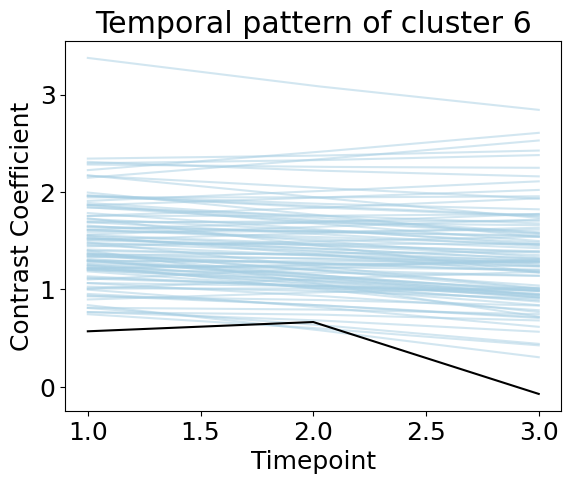

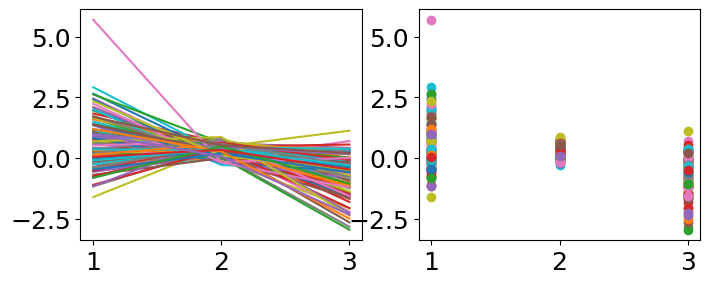

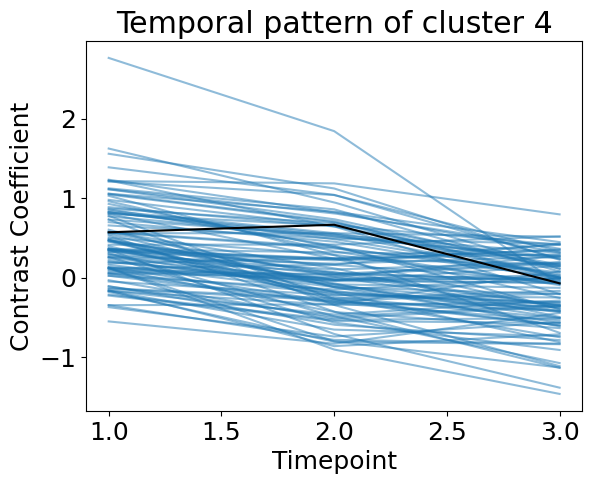

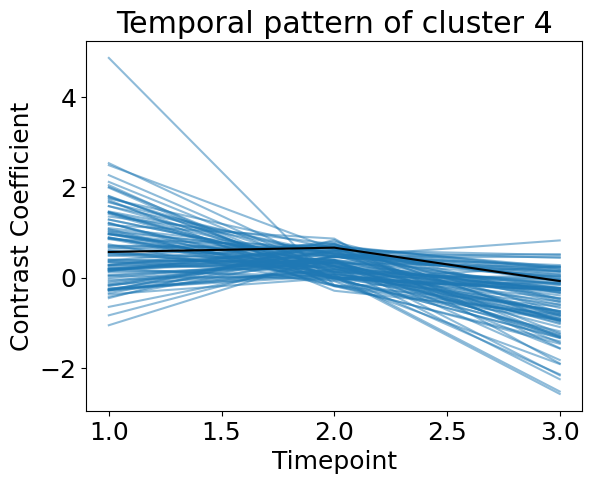

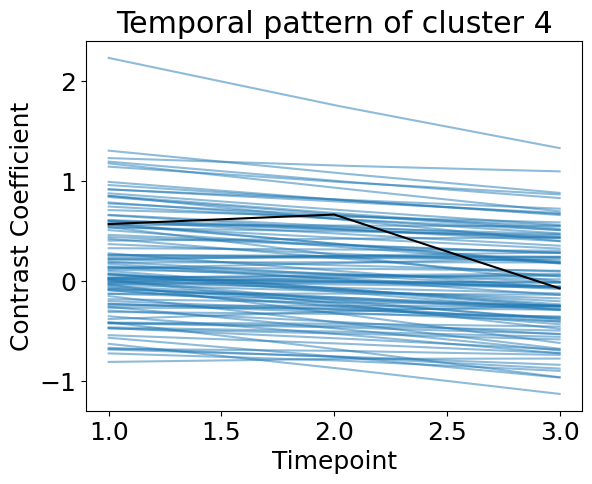

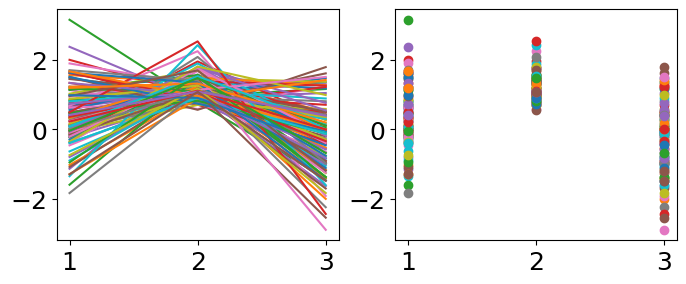

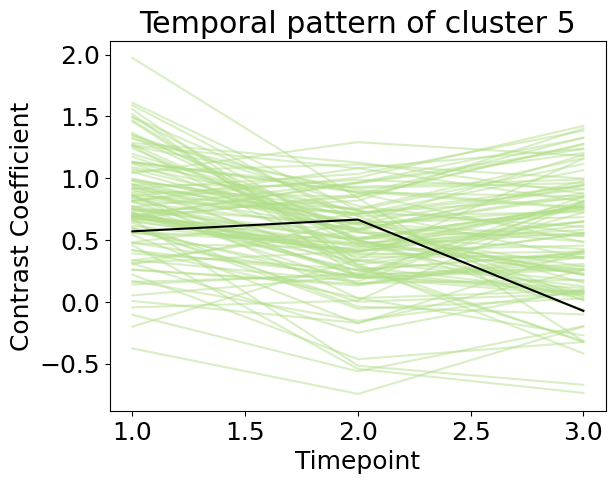

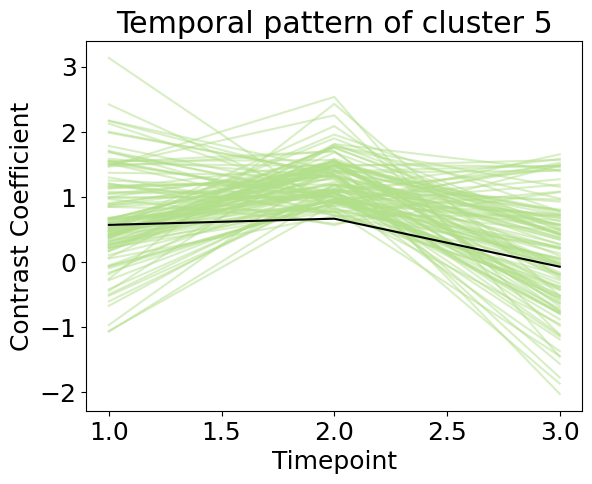

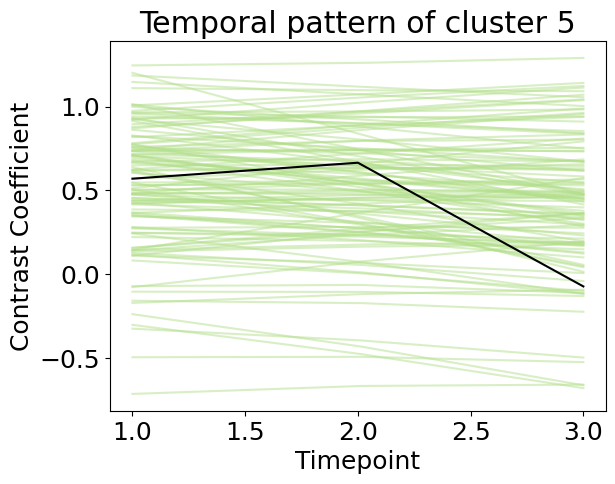

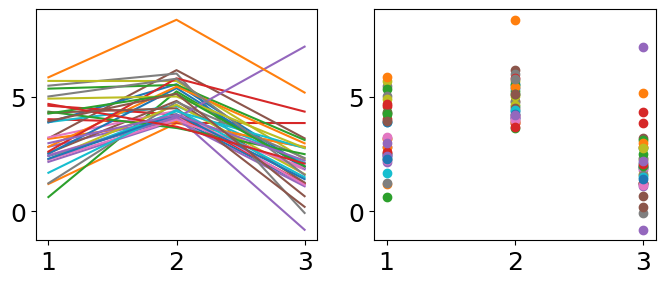

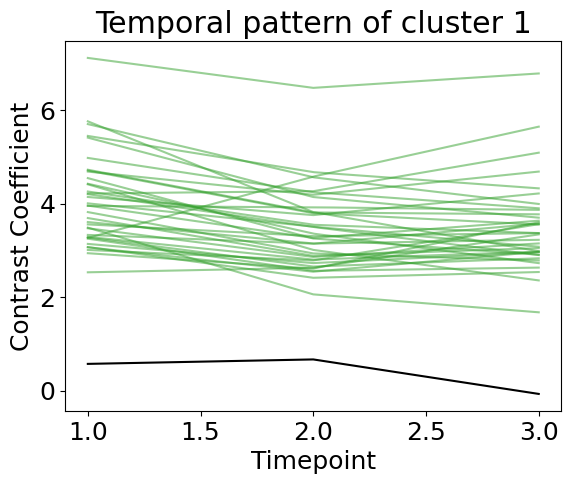

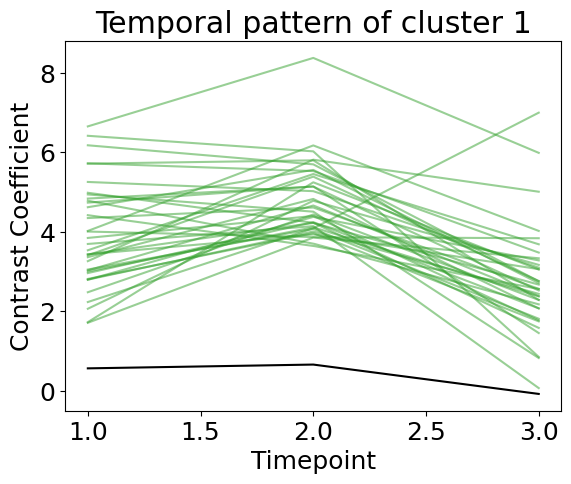

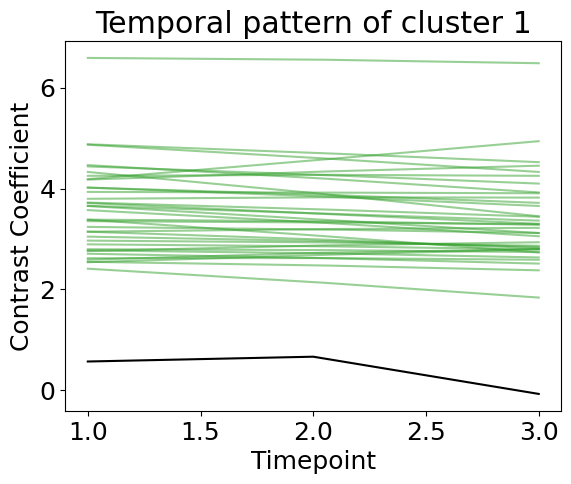

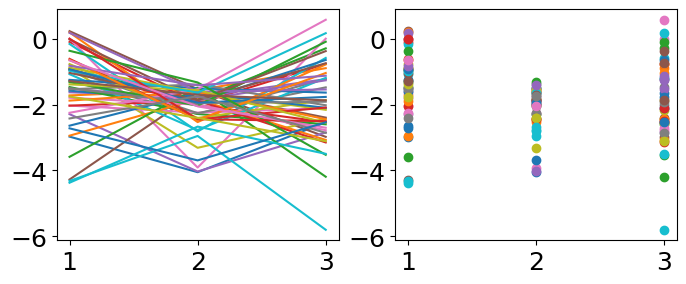

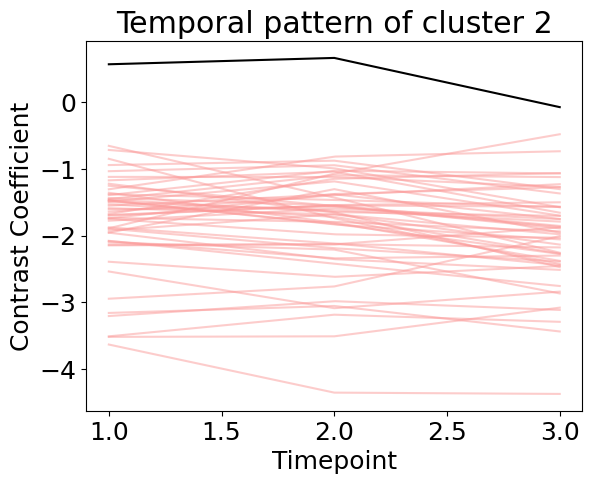

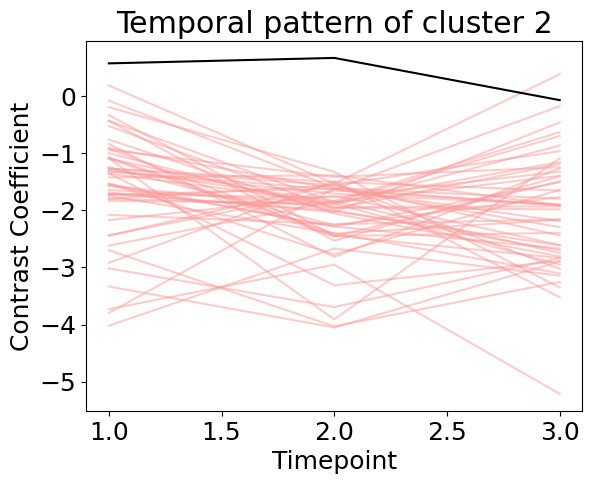

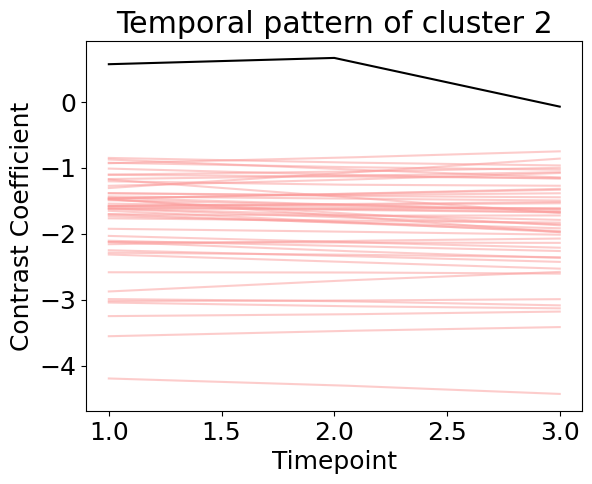

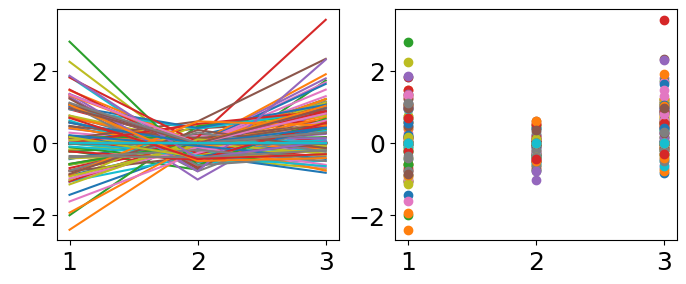

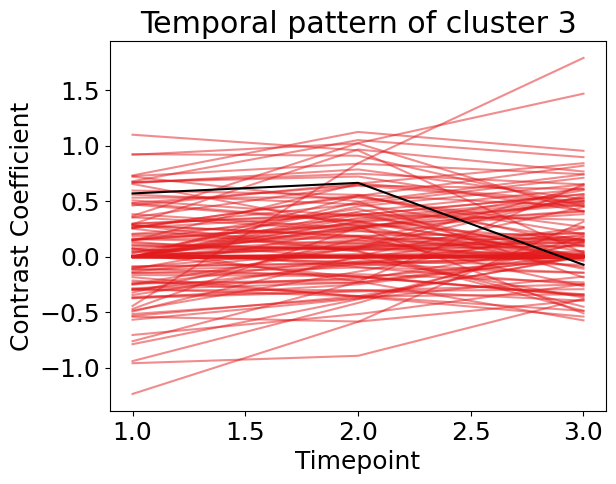

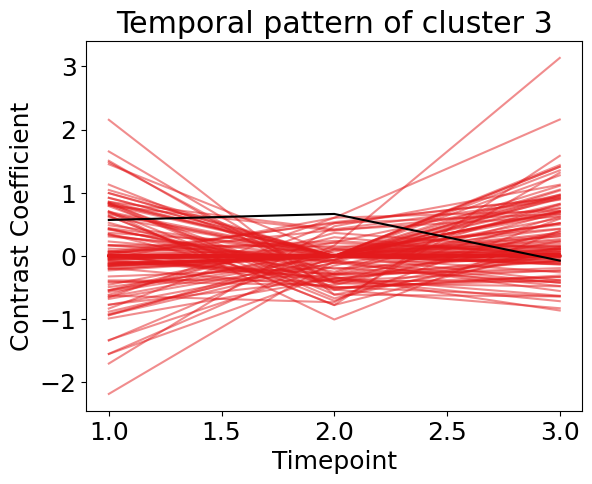

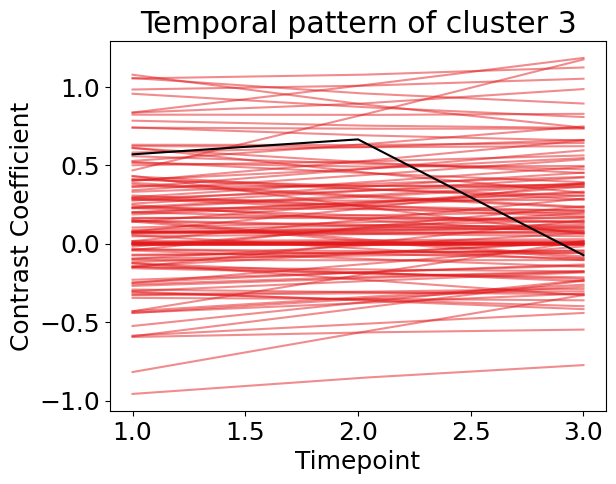

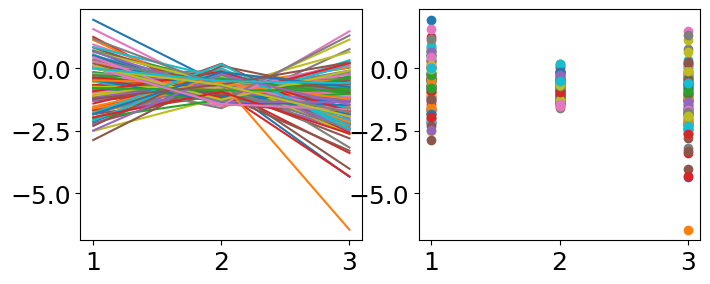

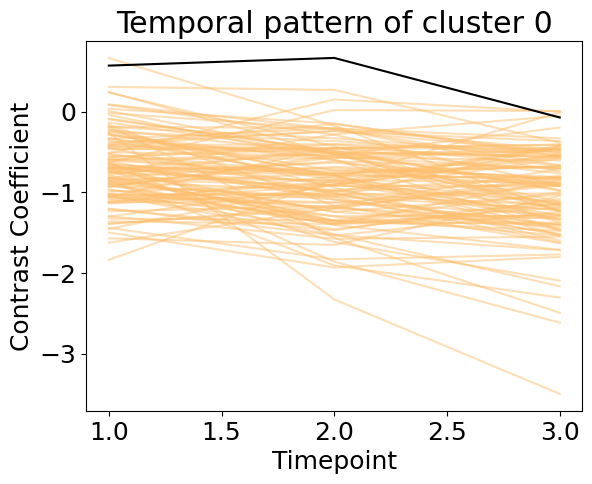

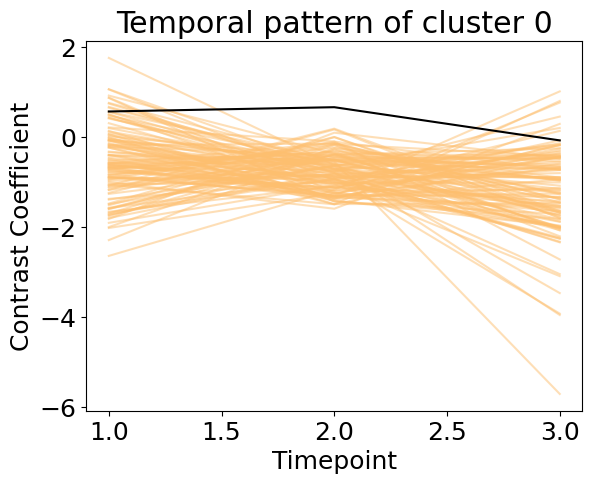

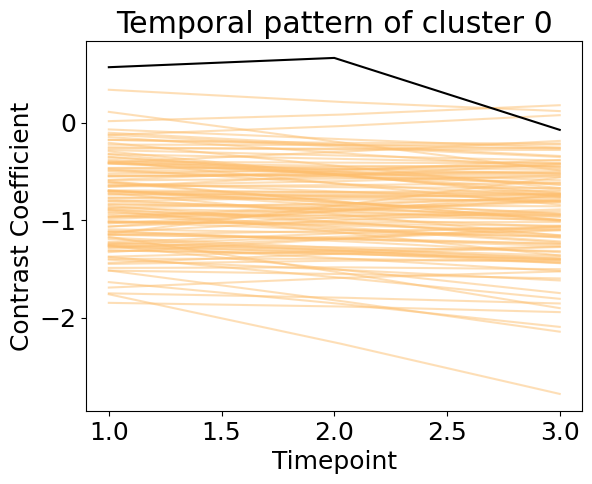

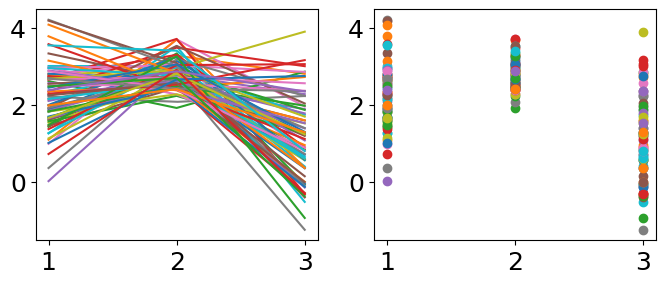

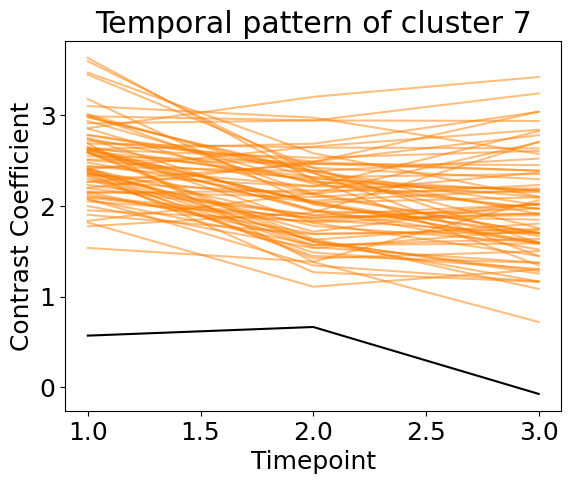

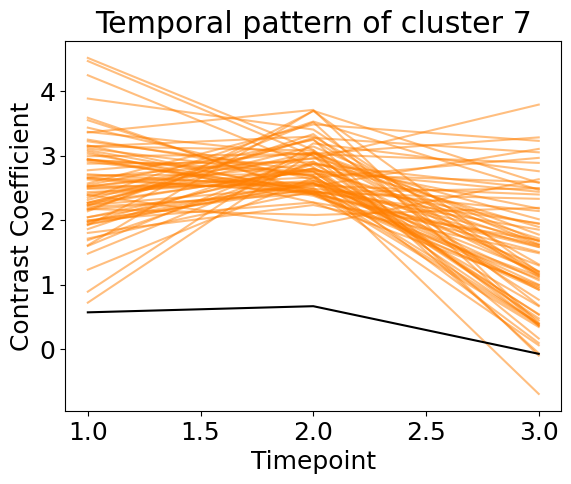

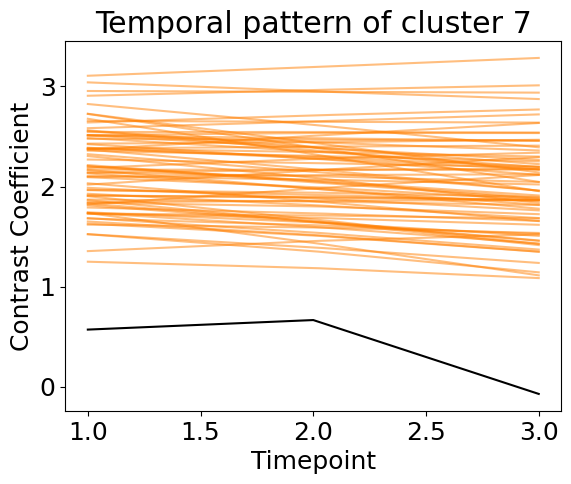

In [5]:
ct.draw_smoothing_clusters(
    fd, 
    df_cluster, 
    n_neighbors = 2, 
    bandwidth = 1,
    cluster_key = 'clusters_fuzzy', 
    output_folder = '/lustre/scratch125/casm/team215mg/pg21_rotation/Temporal_CellDrift/cluster_fuzzy/'
)

In [2]:
adata = sc.read('/lustre/scratch125/casm/team215mg/pg21_rotation/scripts/Coefficients_CellDrift/selection_rep_1/CellDrift_object_time_24.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 4664 × 774
    obs: 'sample', 'species', 'gene_count', 'tscp_count', 'mread_count', 'bc1_wind', 'bc2_wind', 'bc3_wind', 'bc1_well', 'bc2_well', 'bc3_well', 'sublib', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'outlier', 'n_genes', 'doublet_scores', 'predicted_doublets', 'split_batch', 'doublet_assign', 'experiment', 'sample_orig', 'sample_num', 'condition', 'sample_name', 'leiden_subclust_0.5', 'leiden_subclust_0.6', 'leiden_subclust_0.7', 'leiden_subclust_0.8', 'leiden_subclust_0.9', 'leiden_subclust_1.0', 'leiden_subclust_1.1', 'leiden_subclust_1.2', 'leiden_subclust_1.3', 'leiden_subclust_1.4', 'leiden_subclust_1.5', 'S_score', 'G2M_score', 'phase', 'cell_cycle_diff', 'rep', 'd

In [4]:
np.unique(adata.obs['final_group_labeled'])

array(['Cycling', 'Hybrid/Fetal-like', 'Hybrid/Stem-like', 'Respiration',
       'Secretory-like', 'Stress, EMT'], dtype=object)

In [8]:
for state in np.unique(adata.obs['final_group_labeled']):
    print(state, adata[adata.obs['final_group_labeled'] == state].shape[0])

Cycling 723
Hybrid/Fetal-like 800
Hybrid/Stem-like 800
Respiration 741
Secretory-like 800
Stress, EMT 800
